<a href="https://colab.research.google.com/github/rizgar920it/solutions_repo/blob/main/mechanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

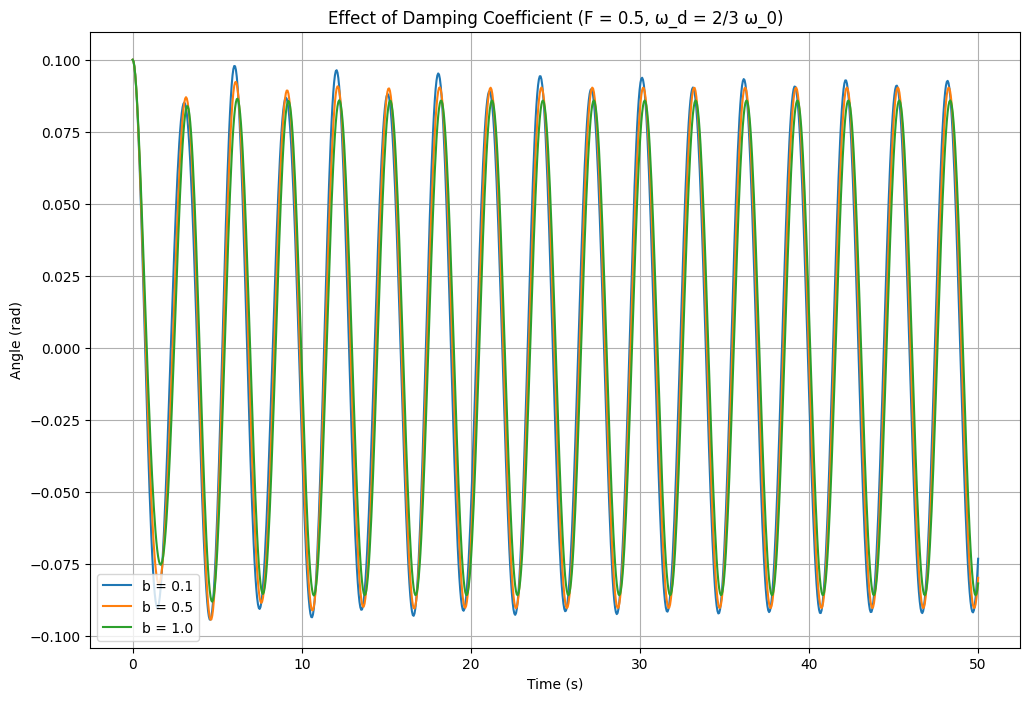

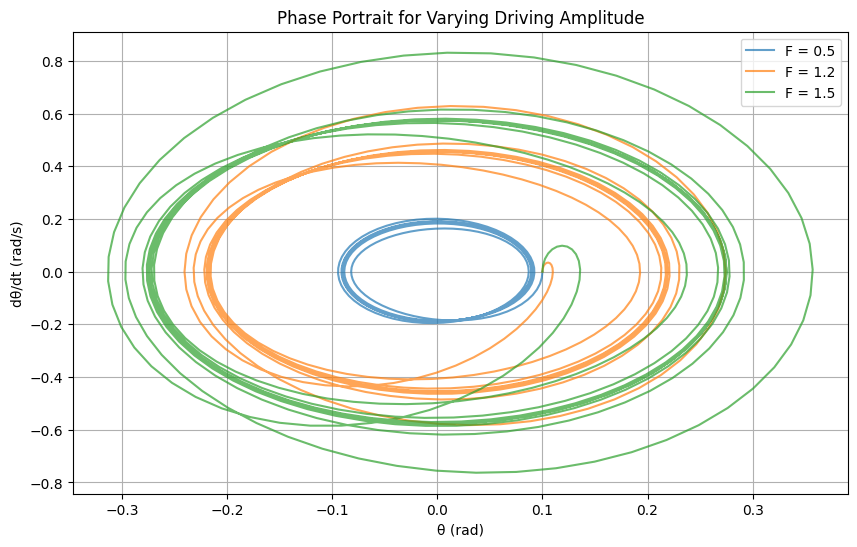

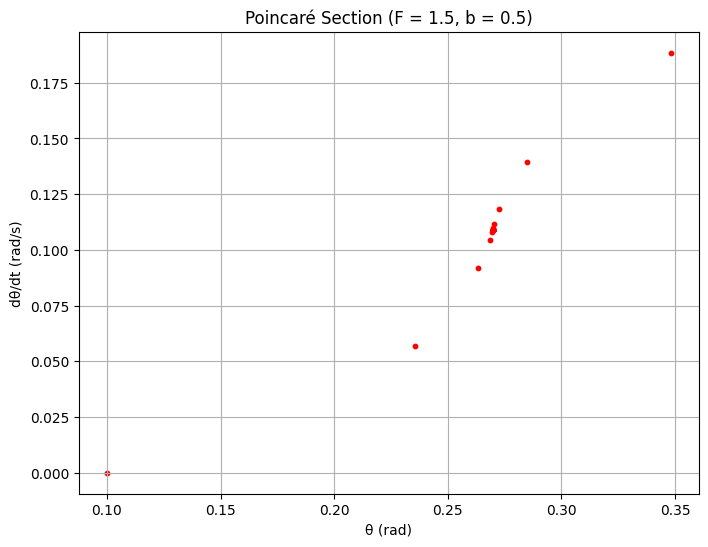

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system
def pendulum_deriv(state, t, b, omega0_sq, F, omega_d):
    theta, theta_dot = state
    dtheta_dt = theta_dot
    dtheta_dot_dt = -b * theta_dot - omega0_sq * np.sin(theta) + F * np.cos(omega_d * t)
    return [dtheta_dt, dtheta_dot_dt]

# Parameters
g = 9.8
L = 1.0
omega0_sq = g / L
b_values = [0.1, 0.5, 1.0]  # Damping coefficients
F_values = [0.5, 1.2, 1.5]  # Driving amplitudes
omega_d = 2.0 / 3.0 * np.sqrt(g / L)  # Driving frequency
t = np.linspace(0, 50, 1000)  # Time array
initial_conditions = [0.1, 0.0]  # [theta0, theta_dot0]

# Simulate and plot for varying b
plt.figure(figsize=(12, 8))
for b in b_values:
    sol = odeint(pendulum_deriv, initial_conditions, t, args=(b, omega0_sq, F_values[0], omega_d))
    plt.plot(t, sol[:, 0], label=f'b = {b}')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Effect of Damping Coefficient (F = 0.5, ω_d = 2/3 ω_0)')
plt.legend()
plt.grid()
plt.show()

# Phase portrait
plt.figure(figsize=(10, 6))
for F in F_values:
    sol = odeint(pendulum_deriv, initial_conditions, t, args=(0.5, omega0_sq, F, omega_d))
    plt.plot(sol[:, 0], sol[:, 1], label=f'F = {F}', alpha=0.7)
plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Phase Portrait for Varying Driving Amplitude')
plt.legend()
plt.grid()
plt.show()

# Poincaré section (sample at driving period)
T_d = 2 * np.pi / omega_d
t_poincare = np.arange(0, 100, T_d)
sol_poincare = odeint(pendulum_deriv, initial_conditions, t_poincare, args=(0.5, omega0_sq, 1.5, omega_d))
plt.figure(figsize=(8, 6))
plt.scatter(sol_poincare[:, 0], sol_poincare[:, 1], s=10, c='red')
plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Poincaré Section (F = 1.5, b = 0.5)')
plt.grid()
plt.show()